In [14]:
import importlib
import sys
sys.path.append("../")
sys.path.append('../../../')
import explainers.GNNBoundary.gnn_boundary.models as models
from torch_geometric.data import Data
from utility_functions import *
import torch
#sys.path.append("./explainers/XGNN")
#sys.path.append("./graph_generation")
#import HouseSet as HouseSet
from XGNNInterface  import XGNNInterface
import matplotlib.pyplot as plt

In [2]:
model = models.GCNClassifier(hidden_channels=16,node_features=3,num_classes=2,num_layers=3)

In [3]:
import os
cwd = os.getcwd()
file_path = os.path.abspath(os.path.join(cwd, '../../../model/report_models/grids.pt'))
model.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [4]:
mw = lambda x,e : model_wrapper(x,e,model=model)
encoding_dict = one_hot_encoding(3)
cgd = lambda nx_graph: convertNxToData(nx_graph, encoding_dict)

In [5]:
res = {0:{}, 1:{}}
for cl in [0,1]:
    for starting_node in [0,1,2]:
        explainer = XGNNInterface(9, 30, cl, 1000, 3, model = mw,\
                                      convertNxToData = cgd, starting_node=starting_node,\
                                          checkpoint=False)
        graph,prob = explainer.train()
        res[cl][starting_node] = (graph,prob)

Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model


In [10]:
res

{0: {0: (Data(x=[9, 3], edge_index=[2, 23]), 1.0),
  1: (Data(x=[9, 3], edge_index=[2, 14]), 0.9999985694885254),
  2: (Data(x=[9, 3], edge_index=[2, 17]), 1.0)},
 1: {0: (Data(x=[1, 3], edge_index=[2, 0]), 0.0017366954125463963),
  1: (Data(x=[1, 3], edge_index=[2, 0]), 0.0058349608443677425),
  2: (Data(x=[1, 3], edge_index=[2, 0]), 0.005451753735542297)}}

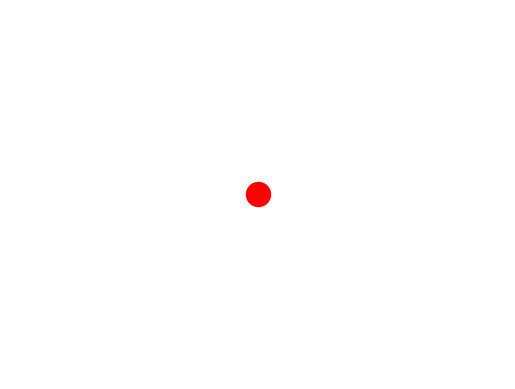

In [11]:
printGraph(res[1][0][0])#,"./images/grid_cl0_start0")

In [13]:
for cl in [0,1]:
    for starting_node in [0,1,2]:
        printGraph(res[cl][starting_node][0],f"./images/grid_cl{cl}_start{starting_node}")
        plt.clf()

<Figure size 640x480 with 0 Axes>

## Hyperparameter-Tuning

In [ ]:
reward_stepwise_li = [0.1,0.2,0.3,0.4,0.5]
roll_out_alpha_li = [1,2,4]

res = {}
for reward_stepwise in reward_stepwise_li:
    for roll_out_alpha in roll_out_alpha_li:
        res[reward_stepwise,roll_out_alpha] = {}
        for starting_node in [0,1,2]:
            explainer = XGNNInterface(9, 30, ???, 1000, 3, model = mw,\
                                      convertNxToData = cgd, starting_node=starting_node,\
                                          checkpoint=False)
            graph,prob = explainer.train()
            res[